# Python For Finance


## What will we learn in this class?

* Simulate stochastic proceses
* Simulate financial assets stochastic processes 
* Valuate a financial deriviate using simulation
* Convex Optimization for Portfolio cons

In this class we will explore python for its usage in traditional finance. i.e. simulation, derivatives pricing and portfolio optimization. 


sources:

 Python For Finance by YVes Lipsich
 

# Stochastics


In [1]:


import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl



### Random Numbers


In [2]:


npr.seed(100)  
np.set_printoptions(precision=4)



In [3]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [4]:


a = 5.  
b = 10.  
npr.rand(10) * (b - a) + a



array([9.4566, 6.046 , 5.9266, 5.5419, 6.0985, 9.8931, 9.0584, 5.8597,
       9.0811, 6.3704])

In [5]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)  
rn2 = npr.randint(0, 10, sample_size)  
rn3 = npr.sample(size=sample_size)  
a = [0, 25, 50, 75, 100]  
rn4 = npr.choice(a, size=sample_size)

(array([ 85.,   0.,   0.,   0.,   0.,   0.,  97.,   0.,   0.,   0.,   0.,
          0., 107.,   0.,   0.,   0.,   0.,   0., 102.,   0.,   0.,   0.,
          0.,   0., 109.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

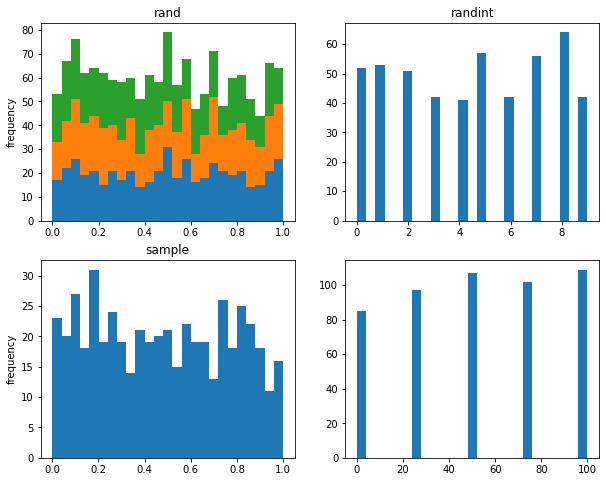

In [6]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)

In [7]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)  
rn2 = npr.normal(100, 20, sample_size)  
rn3 = npr.chisquare(df=0.5, size=sample_size)  
rn4 = npr.poisson(lam=1.0, size=sample_size)

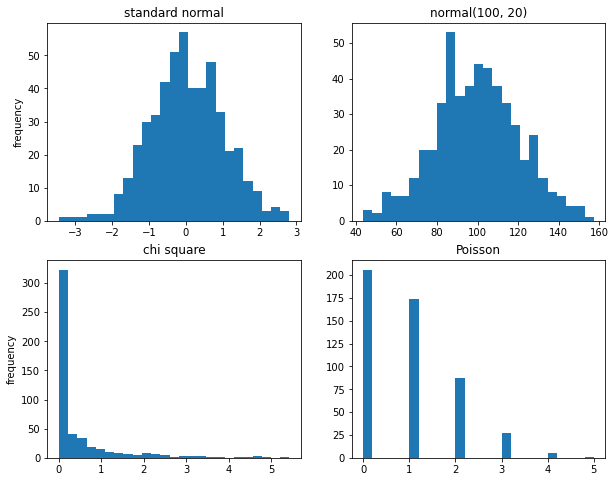

In [8]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

### Simulation


In [9]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  
I = 10000  
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))

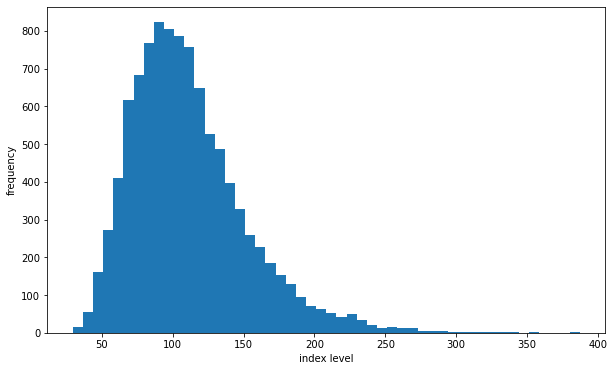

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [11]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

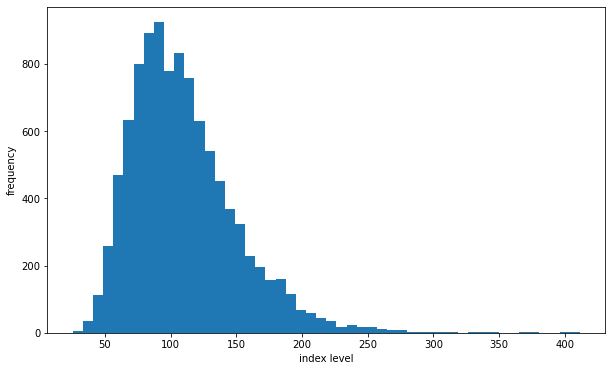

In [12]:


plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [13]:
import scipy.stats as scs

In [14]:


def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))



In [15]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         29.291         25.399
           max        387.407        411.595
          mean        110.982        109.812
           std         40.584         40.092
          skew          1.112          1.166
      kurtosis          2.028          2.619


## Stochastic Proceses



### Black and Scholes

$$
S_T=S_0exp((r-\frac{1}{2}\sigma^2)T +\sigma\sqrt{T}z
$$

Where $Z$ is a standard normal





In [16]:


S0 = 100 # 
r = 0.05 # 
sigma = 0.25 # 
T = 2.0 # 
I = 10000 #number of simulations
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I)) 

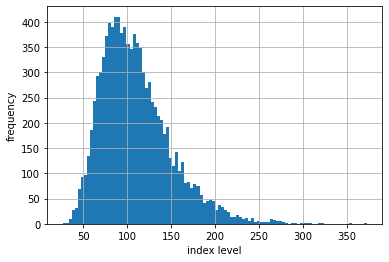

In [17]:
plt.hist(ST1, bins=100)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True) 

### Square Root Difussion (Aka CIR)

This procees are often used to simulate volatilities or interest rates as they have the property to exhibit  mean revertion. The Euler discretization for Cox Ingersoll Roll is the following:

$$
\hat{x_t}=\hat{x_s}+\kappa(\theta-\hat{x_s}^{+}\Delta t)+\sigma\sqrt{\Delta t \hat{x_s}^{+} }z_t
$$





In [18]:
x0 = 0.05
kappa = 3
theta = 0.02
sigma = 0.1 

In [19]:
#This process cant accept negative values . we cant eliminate them directly from the discretization
#we must eliminate them directly from the simulation of random numbers
#numeros aleatorios.
I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                 + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)
                 * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler() 


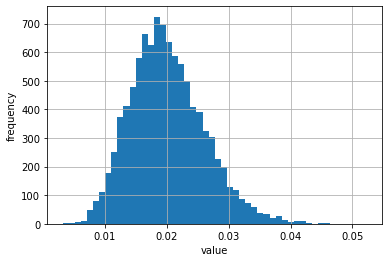

In [20]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True) 

### Stochastic Volatility

The heston model

$$
dS_t=rS_tdt+\sqrt(v_t)S_tdZ_t^1
$$

$$
dv_t=\kappa(\theta-v_t)dt+\sigma\sqrt(v_t)dZ_t^2
$$

$$
dZ_t^1dZ_t^2=\rho
$$

In [21]:
S0 = 100
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [22]:
# using cholesky decomposition
# https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution

In [23]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 

In [24]:
cho_mat.shape

(2, 2)

In [25]:
#generate random numbers

In [26]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I)) ### NOTA Estamos generando dos matrices cada matrices tiene M+1 XI

In [27]:

#first volatility
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
             + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)
             * ran[1])
v = np.maximum(vh, 0)

In [28]:
#next the index
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[0] * np.sqrt(dt)) 

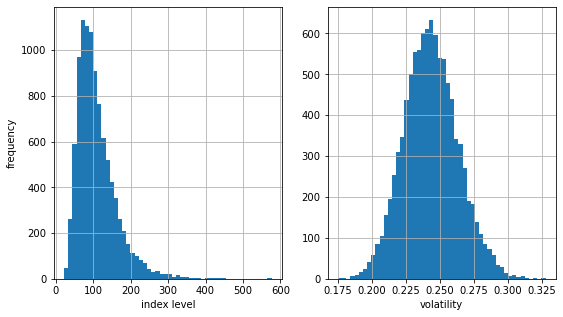

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True) 

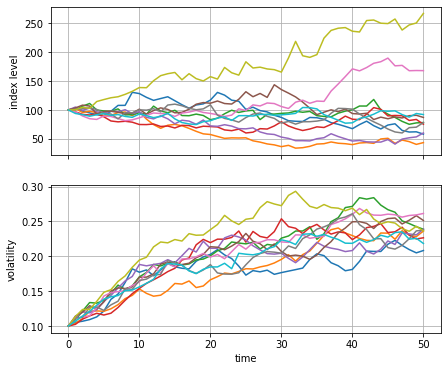

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True) 

### Jump Difussion
lets look at the last example in the book. The merton model with poisson jumps. Can you code it your self?




### Derivatives Valuation. 

If we wanted to price a derivative that is path dependent then we could use the fact that any derivative can be priced as: 

$$V=\frac{1}{I}int_{0}^{S}\ xf(x)e^{-rt}dx$$


Lets make an exercise to valuate a call with Knock out using the three previoys models. 

**NOTE: If you are serious about derivates pricing. I recommend the free open source library Quantlib.** 




### Portfolio Optimization

Now lets look at another classical task,  markowitz optimization. Please note that we are using here the library cvxopt. This is a great and widely used library for convex optimization. We will use it our machine learning class


source: 

https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/

https://cvxopt.org/

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd



## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)


Text(0, 0.5, 'returns')

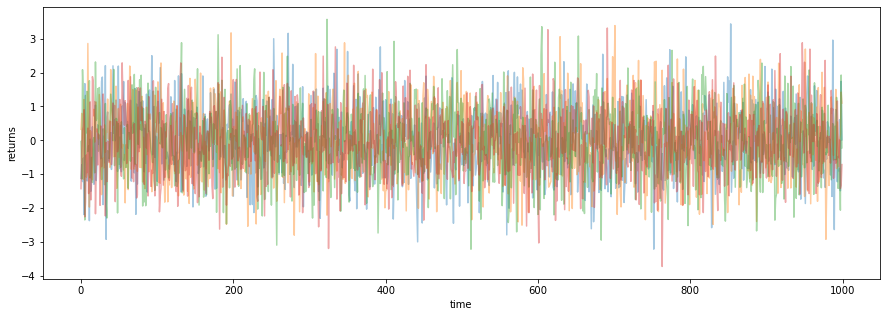

In [32]:
fig = plt.figure(figsize=(15,5))
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')


In [33]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)


In [34]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma



In the code you will notice the calculation of the return with:
$$
R=pTw
$$
where $R$
is the expected return, $pT$ is the transpose of the vector for the mean returns for each time series and $w$ is the weight vector of the portfolio. $p$ is a $Nx1$ column vector, so $pT$

turns into a $1xN$ row vector which can be multiplied with the $Nx1$ weight (column) vector w to give a scalar result. This is equivalent to the dot product used in the code. Keep in mind that Python has a reversed definition of rows and columns and the accurate NumPy version of the previous equation would be $R = w * p.T$

Next, we calculate the standard deviation with
$$
\sigma=\sqrt{wTCw}
$$
where $C$ is the covariance matrix of the returns which is a NxN matrix. Please note that if we simply calculated the simple standard deviation with the appropriate weighting using ```std(array(ret_vec).T*w)``` we would get a slightly different ’bullet’. This is because the simple standard deviation calculation would not take covariances into account. In the covariance matrix, the values of the diagonal represent the simple variances of each asset while the off-diagonals are the variances between the assets. By using ordinary ```std()``` we effectively only regard the diagonal and miss the rest. A small but significant difference.

Lets generate the mean returns and volatility for 500 random portfolios:

In [35]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

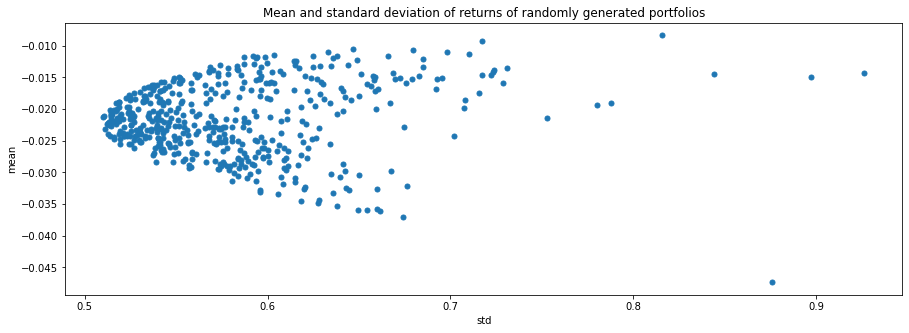

In [36]:
fig = plt.figure(figsize=(15,5))
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')


Once we have a good representation of our portfolios as the blue dots show we can calculate the efficient frontier Markowitz-style. This is done by minimising
$$
wTCw
$$
for $w$
on the expected portfolio return $RTw$

whilst keeping the sum of all the weights equal to 1:

$$
\sum_iw_i=1
$$
Here we parametrically run through $RTw=μ$
and find the minimum variance for different μ

‘s. This can be done with scipy.optimise.minimize but we have to define quite a complex problem with bounds, constraints and a Lagrange multiplier. Conveniently, the cvxopt package, a convex solver, does all of that for us. We used one of their examples with some modifications as shown below. You will notice that there are some conditioning expressions in the code. They are simply needed to set up the problem. For more information please have a look at the cvxopt example.

The mus vector produces a series of expected return values μ
in a non-linear and more appropriate way. We will see later that we don‘t need to calculate a lot of these as they perfectly fit a parabola, which can safely be extrapolated for higher values.

     pcost       dcost       gap    pres   dres
 0:  3.3591e-02 -9.8058e-01  1e+00  3e-17  3e+00
 1:  3.3171e-02  1.0050e-02  2e-02  8e-17  6e-02
 2:  2.9755e-02  2.7898e-02  2e-03  1e-16  7e-04
 3:  2.8918e-02  2.8686e-02  2e-04  6e-17  2e-17
 4:  2.8767e-02  2.8745e-02  2e-05  8e-17  7e-18
 5:  2.8748e-02  2.8748e-02  4e-07  6e-17  1e-17
 6:  2.8748e-02  2.8748e-02  4e-09  1e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.5207e-02 -9.7900e-01  1e+00  1e-16  3e+00
 1:  3.4800e-02  1.1714e-02  2e-02  1e-16  6e-02
 2:  3.1735e-02  2.9902e-02  2e-03  1e-16  8e-04
 3:  3.1060e-02  3.0819e-02  2e-04  9e-17  1e-17
 4:  3.0959e-02  3.0925e-02  3e-05  1e-16  9e-18
 5:  3.0944e-02  3.0939e-02  5e-06  1e-16  4e-18
 6:  3.0941e-02  3.0940e-02  6e-07  7e-17  1e-17
 7:  3.0941e-02  3.0941e-02  3e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7019e-02 -9.7722e-01  1e+00  1e-16  3e+00
 1:  3.6627e-02  1.3581e

     pcost       dcost       gap    pres   dres
 0:  7.3014e+01  7.2000e+01  1e+00  3e-16  3e+00
 1:  7.3014e+01  7.3003e+01  1e-02  1e-16  3e-02
 2:  7.3014e+01  7.3013e+01  1e-04  8e-17  3e-04
 3:  7.3014e+01  7.3014e+01  1e-06  2e-16  3e-06
 4:  7.3014e+01  7.3014e+01  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.1920e+01  8.0906e+01  1e+00  3e-16  3e+00
 1:  8.1920e+01  8.1910e+01  1e-02  1e-16  3e-02
 2:  8.1920e+01  8.1920e+01  1e-04  1e-16  3e-04
 3:  8.1920e+01  8.1920e+01  1e-06  8e-17  3e-06
 4:  8.1920e+01  8.1920e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1913e+01  9.0899e+01  1e+00  6e-17  3e+00
 1:  9.1913e+01  9.1903e+01  1e-02  6e-17  3e-02
 2:  9.1913e+01  9.1913e+01  1e-04  6e-17  3e-04
 3:  9.1913e+01  9.1913e+01  1e-06  1e-16  3e-06
 4:  9.1913e+01  9.1913e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

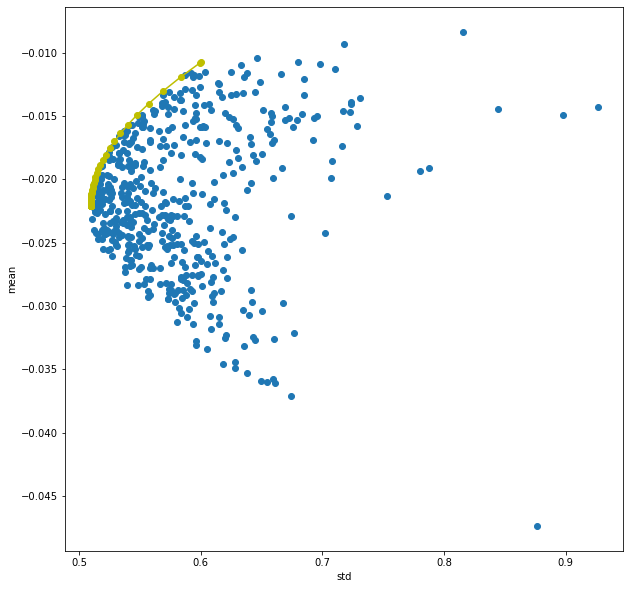

In [38]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure(figsize=(10,10))
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')



# Homework Equal Risk Contribution

Equal Risk Contribution (ERC) is a portfolio-construction technique that weights securities so they contribute equally to the risk of a portfolio. For financial analysts, ERC is an important portfolio construction since it applies the measures of volatility and correlation to position sizing, and it actively seeks risk diversification of the portfolio.\\

From a mathematical perspective, the volatility of a portfolio with weights $w$ can be expressed as:

$$
\sigma(w)=\sum_i w_i\frac{\partial \sigma(w)}{\partial w_i}
$$

where $w_i$ is the weight in the portfolio of asset $i$. The derivative $\frac{\partial \sigma(w)}{\partial w_i}$ is known as the marginal risk contribution.\\

Now we can define the risk contribution as:
$$
\sigma_i=w_i\frac{\partial \sigma(w)}{\partial w_i}
$$

#### 1 Extend DataHandler class  to return daily close prices

#### 2 Create a class called PortfolioModels

#### 3 Create a method that calculates Markowitz weights (use historical data as default arguments,stds=None,returns=None)

#### 4 Create a method that calculates ERC weights. 

#### 5 Create a method that plots both portfolios historical performance


**Note: use  daily close prices for your estimation. you 
